In [1]:
from Model import Levels, ElectronsTransitionsData, AtomsTransitionsData, PickAndSolve, UFloat, utilities
import numpy as np

from PlotUtils import errsPlot as plt, splt

In [2]:
mean = utilities.mean

In [3]:
n_g = 2.687e25
T_g = 300

In [4]:
# Simulate with T_e = 3 and f_e = 10^-5
T_e_real = 2
f_e_real = 10**-5

ns = np.array( [ PickAndSolve.PickAndSolve().getEquilibrium(  n_g = n_g, f_e = f_e_real, T_e = T_e_real, T_g = T_g ) for i in range(50) ] )
n = np.array( [ utilities.mean( ns[:,i] ) for i in range( ns.shape[1] ) ] )
levels_tofit = Levels.Levels().namesToIdxs(['2p1','2p2','2p3','2p4','2p5','2p6','2p7','2p8','2p9','2p10'])
n_real = n[levels_tofit]

Initializing class Levels
Loaded 121 files
Loaded 82 rows


Text(0.5, 1.0, 'Simulated spectra to be fitted')

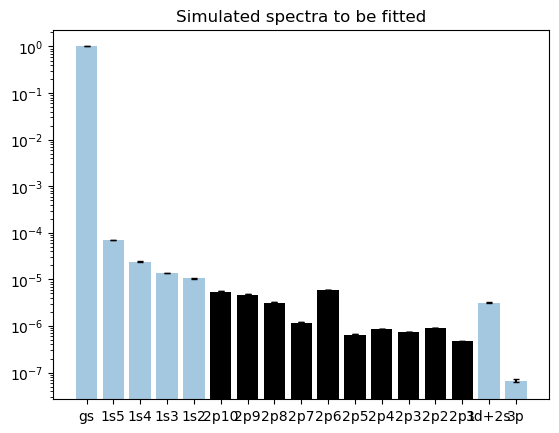

In [5]:
plt.figure()

plt.bar( Levels.Levels().all_names(), n, alpha = 0.4 )
plt.bar( levels_tofit, n_real, keep_color=True )
plt.yscale('log')

plt.title("Simulated spectra to be fitted")

100%|██████████| 10/10 [00:09<00:00,  1.11it/s]


14.999997973323602 7.786507764981831
3.897651344639528 0.20000332106002996
4.118616655071978 0.20000232854298805
4.588310353917545 0.7845923263592366
4.7009888381536165 0.9838882869611111
5.002130920249875 2.090672721418895
4.981443655512746 1.8299907043696246
6.520533579116411 0.20000256631580388
4.906340323558108 2.1264629859815414
14.99998561414483 3.062548882635798
<Model.UFloat.UFloat object at 0x000002A5E55CF350> <Model.UFloat.UFloat object at 0x000002A5E57DC250>
5.0 2


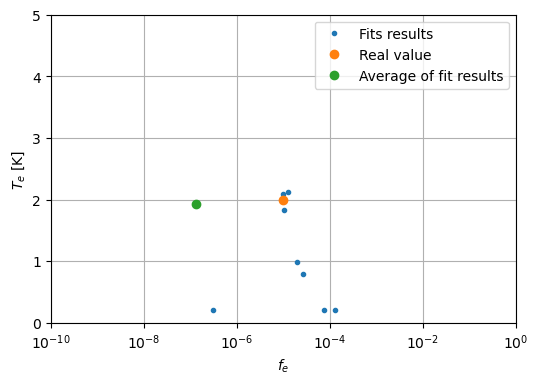

In [6]:
for tol_exp in [14]:

    # Now try to estimate f_e and T_e
    milogf_es, T_es = PickAndSolve.PickAndSolve.manyPicksAndSolveUsingCG(
        n_real, levels_tofit,
        howManyPicks=10,
        tol = 10**(-tol_exp)
    )

    for mg, te in zip( milogf_es, T_es ):
        print( mg, te )

    splt.init()
    plt.semilogx( np.power( 10, -milogf_es), T_es, '.', label = 'Fits results' )
    plt.plot( f_e_real, T_e_real, 'o', label = "Real value" )
    plt.plot( [10**mean( -milogf_es ).n], [mean( T_es ).n], 'o', label = "Average of fit results" )
    plt.xlabel(f"$f_e$")
    plt.xlim( 10**-10, 1 )
    plt.ylabel(f"$T_e$ [K]")
    plt.ylim( 0, 5 )
    plt.legend()

    print( mean( milogf_es ), mean( T_es ) )
    print( -np.log10(f_e_real), T_e_real )

    # splt.export(f"A01_UsingChiSquared_100picks_1e{tol_exp}tol_noGuess_withLogChi")

100%|██████████| 100/100 [01:11<00:00,  1.41it/s]


4.70241191988129 1.3000000007933876
4.219510290936638 0.4100975290028504
15.0 19.8
10.121236201821814 1.284897723262619
14.999996316008913 0.923143837575306
4.890012571806043 1.4999999995520843
4.5288059234485045 0.6975697095751829
4.28535115208864 0.20000237017655914
4.90884837306828 1.7458202601025181
3.912641205376658 0.20000280887833366
4.89749070039329 1.4999999977927037
4.587939184101374 0.7727971535115015
14.99998264555134 0.7584739291894067
4.301670974860478 0.2000023923232082
4.083788454273989 0.20000272375364367
4.973191489597978 1.9928506461115707
3.901312705719024 0.20000269654215616
15.0 4.072527819319108
15.0 3.0185475352176714
15.0 0.42267900822913335
15.0 1.0828274805379212
5.102413618756259 2.217700215369674
4.9268725421561195 1.8999999884772116
3.968074398493326 0.20000300451511588
8.271650277486895 1.7999951525394389
3.6214206361880494 0.20000520349151915
4.933308411322683 1.9999999904962704
4.686310054765393 0.8656921622361049
14.999999689586254 0.9572441872777929
4

100%|██████████| 100/100 [01:11<00:00,  1.40it/s]


14.999991576626833 1.6455471835781144
5.447403693799595 14.8131386969105
10.896946498330317 1.458940990740061
4.991581997678417 2.139562769314246
14.999999391392956 3.49428570543776
15.0 2.51682958148897
4.929804354492509 1.6999999969208217
4.918598091876016 1.8999999952538205
4.456021715224108 0.6618304682557575
4.992335066061303 1.9245223397333733
4.499085650578399 0.6618069181142064
3.6229012103423943 0.2000066618286326
4.890425809273453 1.3670791654403138
15.0 1.3330146929785107
3.8910871112285523 0.20000245575855455
9.358464862961716 1.7895418051474106
15.0 0.7569694492431667
5.1360709268110005 3.6999999991301973
4.944645993773242 2.0203197469099528
4.964906503640186 1.9999996049733761
15.0 2.285307739490098
4.395239378035644 0.5295221500854068
5.0261134213016145 2.170829021399957
4.76905955936462 1.1685169987037791
3.953617487504913 0.20000275312453952
9.265193578427505 4.985131464070062
4.830306426553957 1.500000081264474
4.274369969148836 0.20000240301538771
4.8491810435055 1.8

100%|██████████| 100/100 [01:16<00:00,  1.31it/s]


4.901865038617772 1.5534394984805815
15.0 0.4920088056589629
3.772030887699539 0.2000031184941617
4.942155146795029 2.072660889509018
4.572218032978543 0.7653135818197683
14.999995888286373 5.156687185485408
4.94710946894915 1.9010736211133086
4.358976006174465 0.20000255137170062
4.086379896616201 0.20000245662634686
4.7658507856231855 0.9684457950665605
5.016456108049841 2.2126700505752015
4.842876862468729 1.7000000000005584
4.2021438982824675 0.41160999946290244
12.947979806884746 0.406850951343691
4.4991827766984995 0.6700529098617378
11.01452606928048 0.667331807784592
3.4919124658513607 0.2001797652194829
4.968033113970598 2.271414336621942
3.9375179454378073 0.20000242204644217
4.871880320677722 1.6425004985077603
9.377441537084286 1.7235423176207516
3.9119820666353156 0.30233031077904793
3.899108883435157 0.20000291179252078
15.0 2.5016930715810184
3.6965382038556935 0.20000345874992964
9.022291765369793 1.922928938856528
4.683025619258195 1.0570688355093676
9.938438856618712 

100%|██████████| 100/100 [01:18<00:00,  1.27it/s]


4.481552393351317 0.668677938510062
4.565943172077374 0.79134371408724
3.6115118812380174 0.2000047142535985
5.016895275244944 2.099999996454578
4.437658515963058 0.5474546445219834
4.956978783001744 1.7113657513059246
4.751072941464323 1.2742560887285093
14.999999803527341 11.910793642326086
4.527292133008105 0.6591868487708202
15.0 2.2353106428227276
4.926868140519733 1.7206877577018287
5.087816480307154 2.5400791343051217
4.735848609350665 1.199999994389367
4.194134316785943 0.4089842993290323
15.0 19.8
15.0 3.921996016020014
4.3661504283467485 0.5307627058570826
14.999999143374927 0.5036387873331073
4.76587026050288 1.1999999929672087
9.10197820160832 9.904935782512808
14.999987783483267 15.83299834822486
4.476269523004182 0.6739279121640428
3.9813449636496525 0.20000251675746272
3.8959469203480452 0.2000026233083833
3.574943315600801 0.20000452148575712
3.99012063636107 0.200002731593565
4.600450710296553 0.7960805319444277
4.387045121341449 0.20000234100876402
8.71288001243621 1.

100%|██████████| 100/100 [01:27<00:00,  1.14it/s]


11.68951811913211 4.096744729365166
5.053054180780747 2.44528674387602
15.0 1.1037505795295945
4.636925667897167 0.7760801202930327
4.48555922614937 0.640817897720195
4.785940451258687 1.0893315094574414
14.999999913166775 0.49394334504496645
5.012368092614594 2.2538029297550444
15.0 1.7648602019636612
4.5168411758678335 0.6868408546507001
3.997296499098777 0.20000256296630925
4.697685437798705 1.1270243030654603
4.464719002529355 0.654470277002411
15.0 2.605235122770193
3.881132860003248 0.20000286779756363
4.180699778569315 0.2000025527562167
4.606649076341591 0.7878950282687385
4.245418894940422 0.4075719728783634
4.003383646697041 0.20000280320090644
4.890003609660677 1.8999999929116675
4.678764205916834 0.9761124085446087
14.175884382610706 2.272184462622471
15.0 2.2694352039643775
4.90694522564162 1.9193057893801513
4.226817954078652 0.40985540417554744
5.004441792912686 1.9999999962516197
15.0 0.7791080994928065
8.968252723692848 0.665227130494048
14.999999653335012 0.9009936823

100%|██████████| 100/100 [01:34<00:00,  1.06it/s]


4.363047619357738 0.5373551768120987
4.064866536966742 0.30077981215620436
4.8782221883341785 1.6999999951322455
4.744021235263055 1.1999999930045615
4.356464586546012 0.5243354117548557
14.999991357605186 5.402634611618095
4.384662985569489 0.5272344070186531
5.016225803160465 2.301992735461171
4.011426829139588 0.301645379440786
8.46937417940087 1.6999999951044018
4.195098419272838 0.4172239825986031
4.607202344524292 0.7959001984361643
4.5856001956489285 0.775713815228472
3.861092370606279 0.200003046980248
9.39494325132401 1.7000000133221544
5.012087943240898 2.1692527928414873
15.0 0.8179252335930742
5.138951662933254 2.8411313292527463
4.741146394577541 1.0923543115097547
9.557747417614214 0.7999999988736082
4.009593920273181 0.20000244585296612
3.6109193683118406 0.20000455539758621
5.306467139459245 4.7999999999578264
4.965021086575631 2.1046960581099694
10.708059009178823 2.0610854462560635
4.998215823338407 2.6999999931489884
5.01375526971329 1.7999999936076538
14.99999996767

100%|██████████| 100/100 [01:54<00:00,  1.15s/it]


11.860124448387346 0.11
4.325733168536296 0.20000238907140347
12.509952847057972 2.441110363616758
4.303417343154554 0.20000259929034522
5.143291172673842 3.799999999916329
4.916342403245466 1.5999999973764236
15.0 0.9336138355341348
4.256315276009546 0.40804869848236197
4.097249675243969 0.20000255150858667
15.0 14.929785205778508
3.72589280896287 0.20000431231674695
5.02153571364928 2.099999992026293
4.934562482313834 1.4999999951350338
4.90271960017212 1.5046598508943723
8.600760328326071 1.5999999961986449
5.096607377494409 2.553873937330079
4.984641564340569 2.114409193911624
4.979883879988649 1.8999999960955327
5.122589166256389 2.5999999991534395
5.024422879170815 2.2445741111213815
15.0 0.4237698182703261
15.0 0.20000558239000218
4.3800111588887205 0.5298934086173688
4.89510737567337 1.7994744827224876
4.956841223155088 2.047824804054499
3.9148486773910833 0.2000025580703093
3.6399577032053427 0.2000041088444824
4.7214181894997225 0.8717015622965791
3.9721301969414164 0.2000027

100%|██████████| 100/100 [02:02<00:00,  1.23s/it]


11.715113940117135 1.6200552746312522
4.9714632928518965 2.3999999991727172
10.964659548834652 1.7997232702285466
3.5735794961398213 0.20000774767342772
3.673423714077897 0.2000053053645229
4.392597192710861 0.5300078463776217
4.375408994328273 0.5257693989042735
15.0 0.41018350783788865
3.1366953835042395 0.20180836094073254
4.368786254296376 0.5254748113444779
4.167573491153321 0.2000024057240407
4.247188269708086 0.40956316108113916
5.044288911954811 2.2931166497616697
4.958978763810688 1.7422825501213923
4.217226280122327 0.40760862797463726
4.868793342873489 1.4999999947763791
4.4778913439911525 0.6522549073965149
5.37624290169965 9.499999999319495
5.090684695805047 2.0256115175779907
10.343460815139046 2.005309932957231
4.878563214103287 1.6999999951813685
14.999977213643309 3.0450124024073926
4.427880467500601 0.5229958886390278
4.575402756006235 0.7818212897797661
15.0 0.4849124513523995
15.0 1.5537573609897457
5.094793392317081 3.126586773349395
9.690135019495054 1.79999995100

100%|██████████| 100/100 [01:33<00:00,  1.06it/s]


8.820219488397264 1.6999999965675934
4.88989076228511 1.899999994121863
3.9131178338462385 0.2000027199595854
3.7109805548656256 0.20000370345157706
15.0 0.9463920823870589
4.822079129049779 1.343764474251493
8.131079489423756 1.6999999997568287
15.0 9.668053937850352
8.847580075645743 0.40492879818948924
4.896162985802904 1.7999999954716452
4.970360657351449 1.9663898036389478
4.947310063255697 1.699999999999892
4.014794628126708 0.300701602043864
5.290327115871405 5.299999999834403
15.0 2.47915760478321
4.903507132290273 2.1999999927704614
15.0 8.238507583761548
14.99999373223332 1.1359985400409534
8.244945217392424 0.6427448819176352
4.2030458720452915 0.2000023707122464
4.928602338763292 1.99999999823559
5.094463491036506 2.824759869783632
8.558272005008272 1.6999999996365462
13.456042362271138 1.823405973945001
4.196108866503126 0.410801461142034
4.840044004973565 1.49999999895917
10.372242052573645 6.349511889296822
4.921028095592091 1.7999999948326875
8.911162529332932 1.7999999

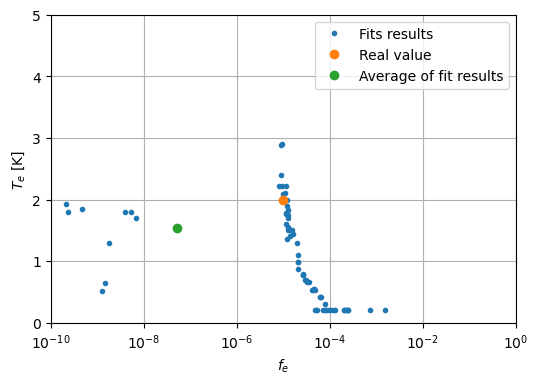

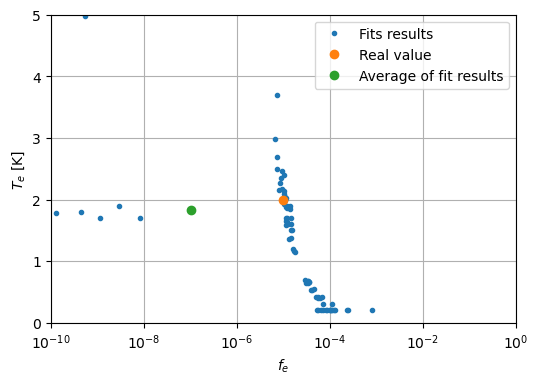

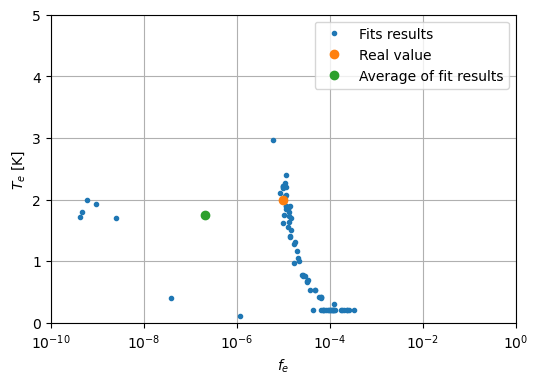

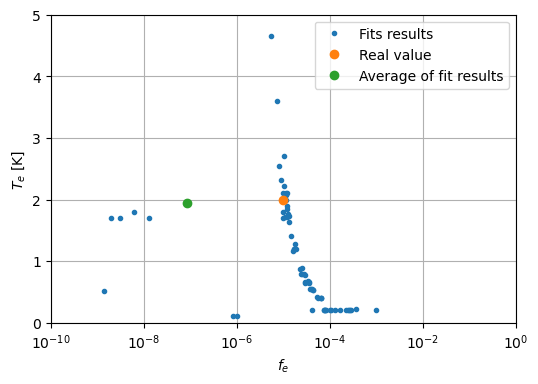

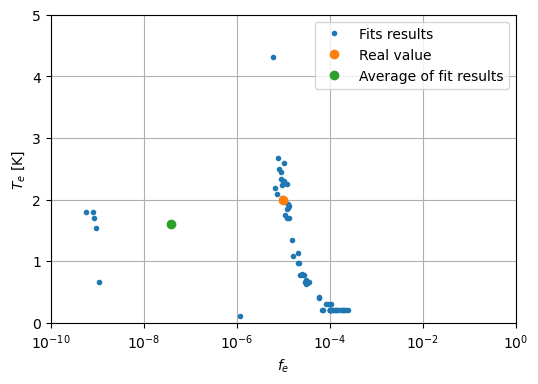

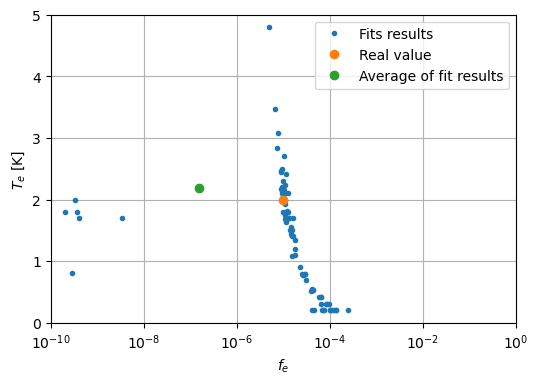

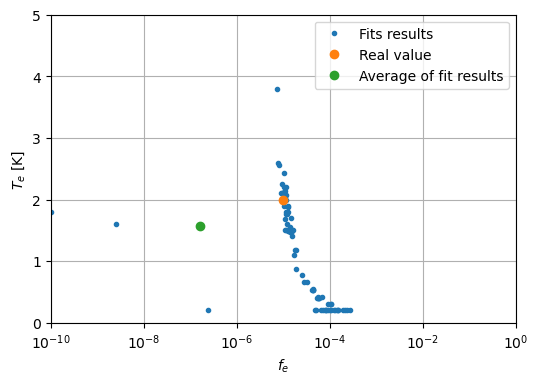

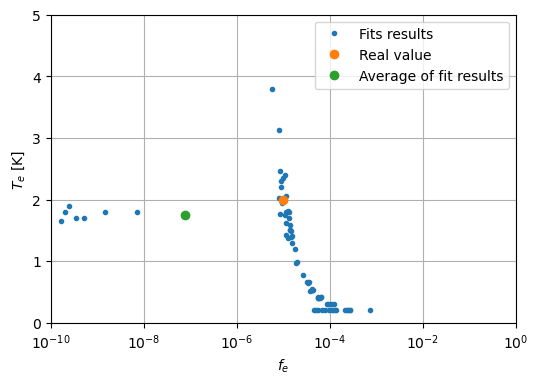

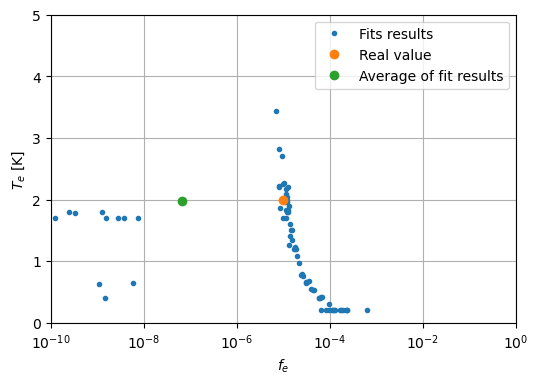

In [10]:
for tol_exp in [8,9,10,11,12,13,14,15,16]:

    # Now try to estimate f_e and T_e
    milogf_es, T_es = PickAndSolve.PickAndSolve.manyPicksAndSolveUsingCG(
        n_real, levels_tofit,
        howManyPicks=100,
        # T_e_guess=T_e_real, minus_log_f_e_guess=-np.log10(f_e_real),
        tol = 10**(-tol_exp)
    )

    # for mg, te in zip( milogf_es, T_es ):
    #     print( mg, te )

        

    splt.init()
    plt.semilogx( np.power( 10, -milogf_es), T_es, '.', label = 'Fits results' )
    plt.plot( f_e_real, T_e_real, 'o', label = "Real value" )
    plt.plot( 10**mean( -milogf_es ).n, mean( T_es ).n, 'o', label = "Average of fit results" )
    plt.xlabel(f"$f_e$")
    plt.xlim( 10**-10, 1 )
    plt.ylabel(f"$T_e$ [K]")
    plt.ylim( 0, 5 )
    plt.legend()

    print( mean( milogf_es ), mean( T_es ) )
    print( -np.log10(f_e_real), T_e_real )

    splt.export(f"A01_UsingChiSquared_100picks_1e{tol_exp}tol_noGuess_withLogChiAndCHmethod")

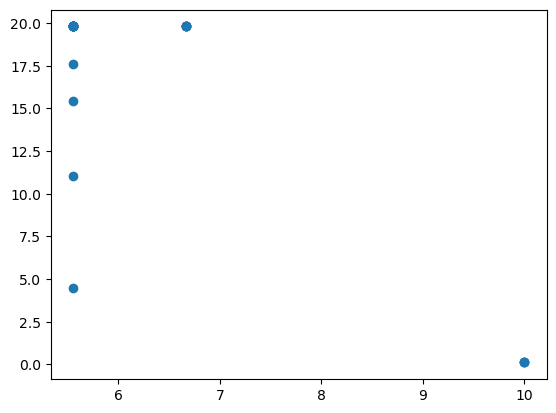

In [ ]:
plt.plot( minus_log_f_es / np.log(10), T_es, 'o' )

In [ ]:
f_es = np.logspace( -10, 0, 50 )
T_es = np.linspace( 0.11, 19.8, 50 )

measured_levels = [ ufloat( 4, 0.2 ), ufloat( 4.5, 0.2 ), ufloat( 8, 0.2 ), ufloat( 2.2, 0.2 )]
measured_levels_idxs = Levels.Levels().namesToIdxs(['2p9', '2p8', '2p6', '2p4'])
#     howManyPicks=25
n_g = 2.687e+29
T_g = 300


data = np.zeros( (len( f_es ), len( T_es )) )
for i_f, f in tqdm( enumerate( f_es ), total=len( f_es ) ):
    for i_t, t in enumerate( T_es ):
        data[ i_f, i_t ] = pas.chiSquared( 
            measured_levels, pas.getEquilibrium( n_g, f, t, T_g )[measured_levels_idxs] )


  0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
print( f_es[ np.unravel_index( np.argmin( data ), data.shape )[0] ], T_es[ np.unravel_index( np.argmin( data ), data.shape )[1] ] )
print( data[ np.unravel_index( np.argmin( data ), data.shape ) ])

3.088843596477485e-06 9.352244897959185
54.47599040542863


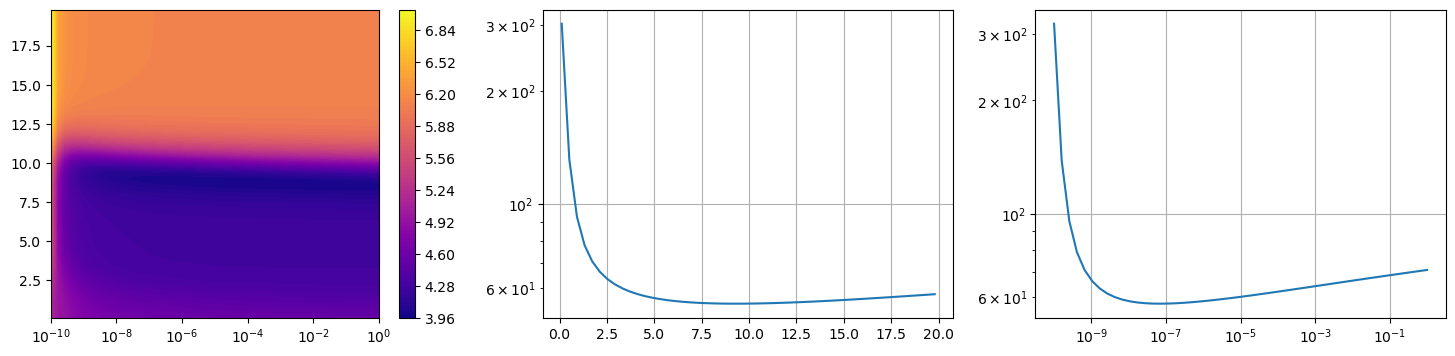

In [ ]:
splt.init_bytot( 3 )
splt.next()

plt.contourf( f_es, T_es, np.log( data ), cmap = 'plasma', levels = 100 )
plt.xscale('log')
plt.colorbar()

splt.next()
plt.semilogy( T_es, data[np.unravel_index( np.argmin( data ), data.shape )[0],:] )
splt.next()
plt.loglog( f_es, data[np.unravel_index( np.argmin( data ), data.shape )[1],:] )

In [ ]:
from scipy.optimize import minimize
from plots import splt

In [ ]:
minimize(
    lambda x: pas.chiSquared( measured_levels, pas.getEquilibrium( n_g, 10**( -x[0] ), x[1], T_g )[measured_levels_idxs] ),
    [ -5, 2 ],
        bounds=[
        (1, 15),
        (0.11, 19.8)
        ],
        callback= lambda intermediate_result : print( intermediate_result.x, intermediate_result.fun ),
        tol = 1e-8
        ).x

[ 1.54428142 18.87190558] 447.7877651136975
[ 4.54460193 19.8       ] 246.4602349405925
[ 9.78081156 18.50237998] 89.0129780199223
[ 8.10644054 19.51341804] 71.92388244087789
[ 8.05882914 19.52419416] 71.89742382368635
[ 7.19101764 19.8       ] 70.85032570501699
[ 5.66324743 19.8       ] 54.9989430288059
[ 5.71519288 19.79676858] 54.96175084268368
[ 5.69465397 19.69591813] 54.92585354983981
[ 5.68744518 19.54526337] 54.91287685089486
[ 5.66108671 18.61096905] 54.851573555256614
[ 5.61072458 16.08278596] 54.70517505470838
[ 5.53967334 11.7319719 ] 54.48747831653253
[ 5.52743095 10.5045056 ] 54.434241309607245
[ 5.55648149 10.71913188] 54.3387110398303
[ 5.57503009 11.07205867] 54.32457409384308
[ 5.5757943  11.05272703] 54.32448306505286
[ 5.57550736 11.02840818] 54.324469724342265
[ 5.57536167 11.01863219] 54.3244645395329
[ 5.5751083  11.00343754] 54.32445629988847
[ 5.57504515 11.00011014] 54.32445441379235
[ 5.5750432  11.00000539] 54.32445435531755


array([ 5.5750432 , 11.00000539])